# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# Import necessary packages
# Standard library imports
import json
import os
import sys

# Data manipulation and numerical computing
import numpy as np
import pandas as pd

# Machine learning - scikit-learn
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report

# Model optimization
import optuna
from optuna.logging import set_verbosity

# Model persistence
import joblib

# Add parent directory to path to import weather module
sys.path.append('../../')

# Import weather module with all utilities
import weather
from weather.plots import set_plot_style

# Set consistent plot styling
set_plot_style()

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Zhiyuan Zhao"
student_id = "25605217"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
Weather prediction model for Sydney that forecasts cumulative precipitation volume over the next three days. Enables 
proactive planning for water resource management, flood prevention, agricultural irrigation scheduling, and infrastructure 
maintenance across various sectors including water utilities, emergency services, and urban planning.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
Accurate precipitation volume predictions enable optimized water management and flood risk assessment. Underestimation 
leads to inadequate preparation for heavy rainfall events while overestimation triggers unnecessary resource allocation. 
Quantitative forecasts support data-driven decision making for infrastructure planning and emergency response.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
Water utilities require volume forecasts for reservoir management and supply planning. Emergency services need quantitative 
predictions for flood response resource allocation. Farmers optimize irrigation based on expected precipitation amounts. 
Construction companies schedule concrete pours and outdoor work considering rainfall intensity. Urban planners assess 
stormwater system capacity requirements.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [13]:
# Load the raw weather data
data_path = '../../data/raw/sydney_weather_daily.csv'
df = pd.read_csv(data_path)

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Date range: from {df['time'].min()} to {df['time'].max()}")
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (31046, 21)
Date range: from 1940-01-02 to 2024-12-31

Column names:
['time', 'weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise', 'sunset', 'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']

First 5 rows:


,time,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,rain_sum,snowfall_sum,precipitation_hours,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1940-01-02,51,22.2,17.4,19.6,21.9,16.2,19.2,1940-01-02T04:48,1940-01-02T19:09,...,2.1,0.0,11.0,45748.11,51663.50,17.7,43.9,153,20.18,4.02
1,1940-01-03,51,25.1,16.4,20.8,25.8,17.5,21.5,1940-01-03T04:49,1940-01-03T19:09,...,1.1,0.0,6.0,48408.09,51627.63,19.7,42.1,61,24.04,4.69
2,1940-01-04,3,28.5,16.6,22.6,29.7,17.8,23.4,1940-01-04T04:49,1940-01-04T19:09,...,0.0,0.0,0.0,48245.77,51589.00,18.4,38.9,44,27.77,5.87
3,1940-01-05,55,22.1,19.3,21.0,23.1,20.3,21.9,1940-01-05T04:50,1940-01-05T19:09,...,9.7,0.0,13.0,9645.05,51547.63,17.3,42.8,12,9.98,2.31
4,1940-01-06,53,29.2,19.3,23.5,32.1,19.6,24.7,1940-01-06T04:51,1940-01-06T19:09,...,3.5,0.0,12.0,36146.81,51503.58,16.6,35.6,86,18.12,4.38


### C.2 Define Target variable

In [14]:
# Define target variable
target_name = 'precipitation_3day'

In [15]:
# <Student to fill this section>
target_definition_explanations = """
Continuous target variable representing cumulative precipitation volume in millimeters over the next three days. Three-day 
window balances forecast accuracy with practical planning horizons for water resource management. Regression approach 
provides quantitative predictions essential for infrastructure capacity planning and risk assessment.
"""

In [16]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [17]:
# Create precipitation regression target variable using weather module function
df['precipitation_3day'] = weather.create_precipitation_3day_target(df)
target_name = 'precipitation_3day'

# Check creation results
print(f"Target variable '{target_name}' created successfully")
print(f"Total rows: {len(df)}")
print(f"Rows with valid target: {df[target_name].notna().sum()}")
print(f"Rows with NaN target (last 3 days): {df[target_name].isna().sum()}")

# Remove rows with missing target values (last 3 days)
df_clean = df.dropna(subset=[target_name])

print(f"\nAfter removing last 3 days:")
print(f"Dataset size: {len(df_clean)}")
print(f"Time range: {df_clean['time'].min()} to {df_clean['time'].max()}")

# Basic statistics of target variable
print(f"\nTarget variable statistics:")
print(f"Mean: {df_clean[target_name].mean():.2f} mm")
print(f"Median: {df_clean[target_name].median():.2f} mm")
print(f"Std: {df_clean[target_name].std():.2f} mm")
print(f"Min: {df_clean[target_name].min():.2f} mm")
print(f"Max: {df_clean[target_name].max():.2f} mm")

# Save the cleaned data with target variable to interim folder
interim_path = '../../data/interim/'
os.makedirs(interim_path, exist_ok=True)

# Save only the cleaned data (without last 3 days)
output_file = os.path.join(interim_path, 'sydney_weather_with_precipitation_3day_target.csv')
df_clean.to_csv(output_file, index=False)
print(f"\nCleaned data with target variable saved to: {output_file}")

# Update df to use the cleaned version
df = df_clean.copy()

Target variable 'precipitation_3day' created successfully
Total rows: 31046
Rows with valid target: 31043
Rows with NaN target (last 3 days): 3

After removing last 3 days:
Dataset size: 31043
Time range: 1940-01-02 to 2024-12-28

Target variable statistics:
Mean: 5.92 mm
Median: 1.30 mm
Std: 13.50 mm
Min: 0.00 mm
Max: 296.50 mm

Cleaned data with target variable saved to: ../../data/interim/sydney_weather_with_precipitation_3day_target.csv


### C.4 Explore Target variable

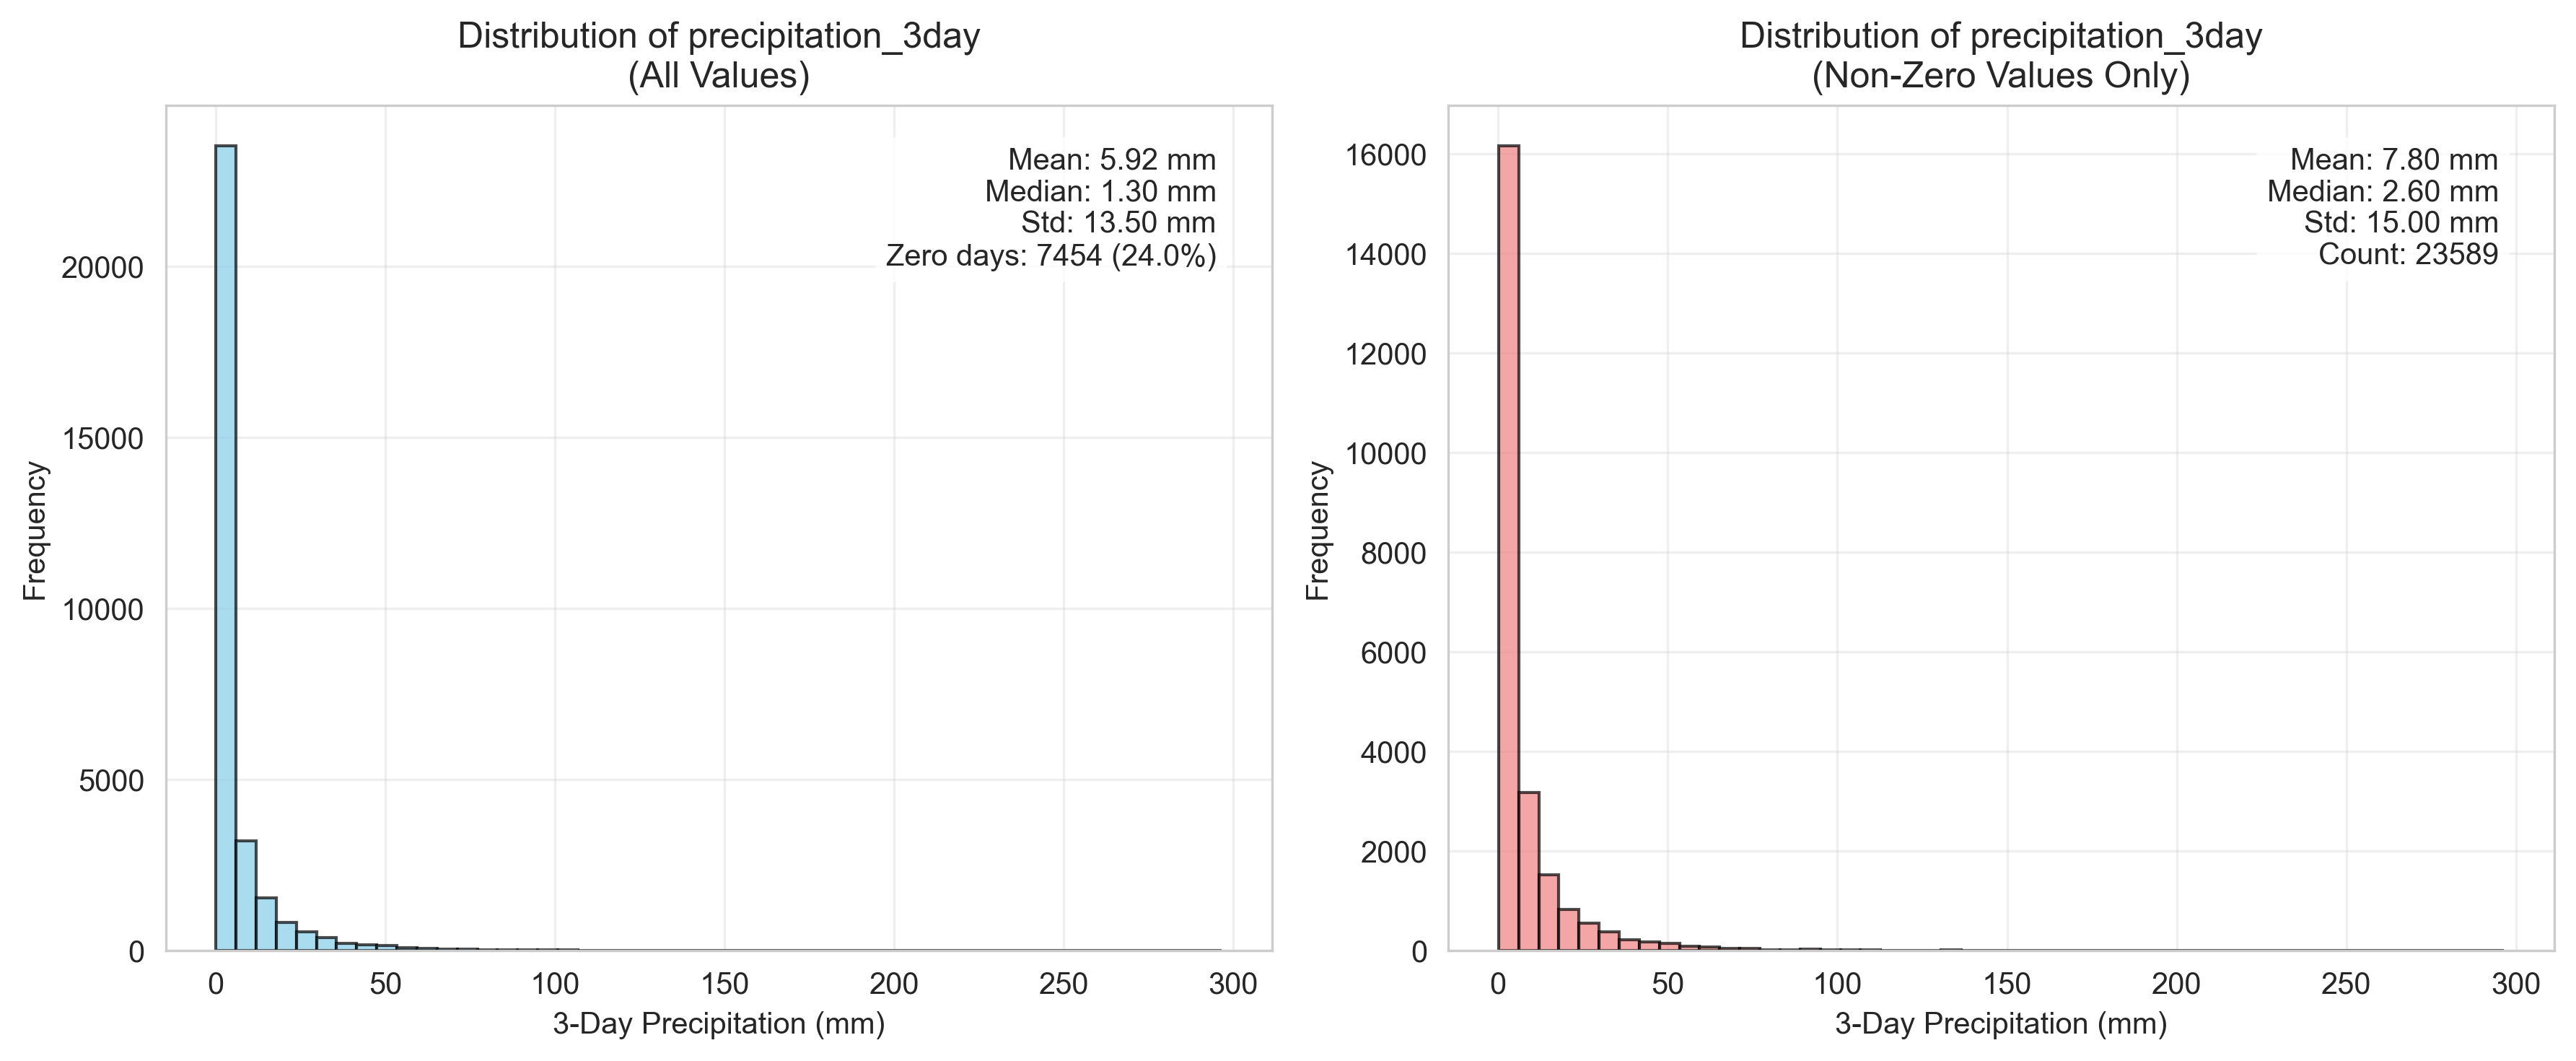

In [18]:
# Explore target variable distribution using weather module
fig = weather.plot_precipitation_distribution(
    df, 
    target_col=target_name,
    figsize=(12, 5)
)

In [19]:
# <Student to fill this section>
target_distribution_explanations = """
Three-day precipitation shows heavily right-skewed distribution with most periods having minimal rainfall. 
Extreme events create long tail indicating occasional heavy precipitation. High variability between dry 
and wet periods challenges prediction modeling approaches.
"""

In [20]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `<precipitation_sum>`

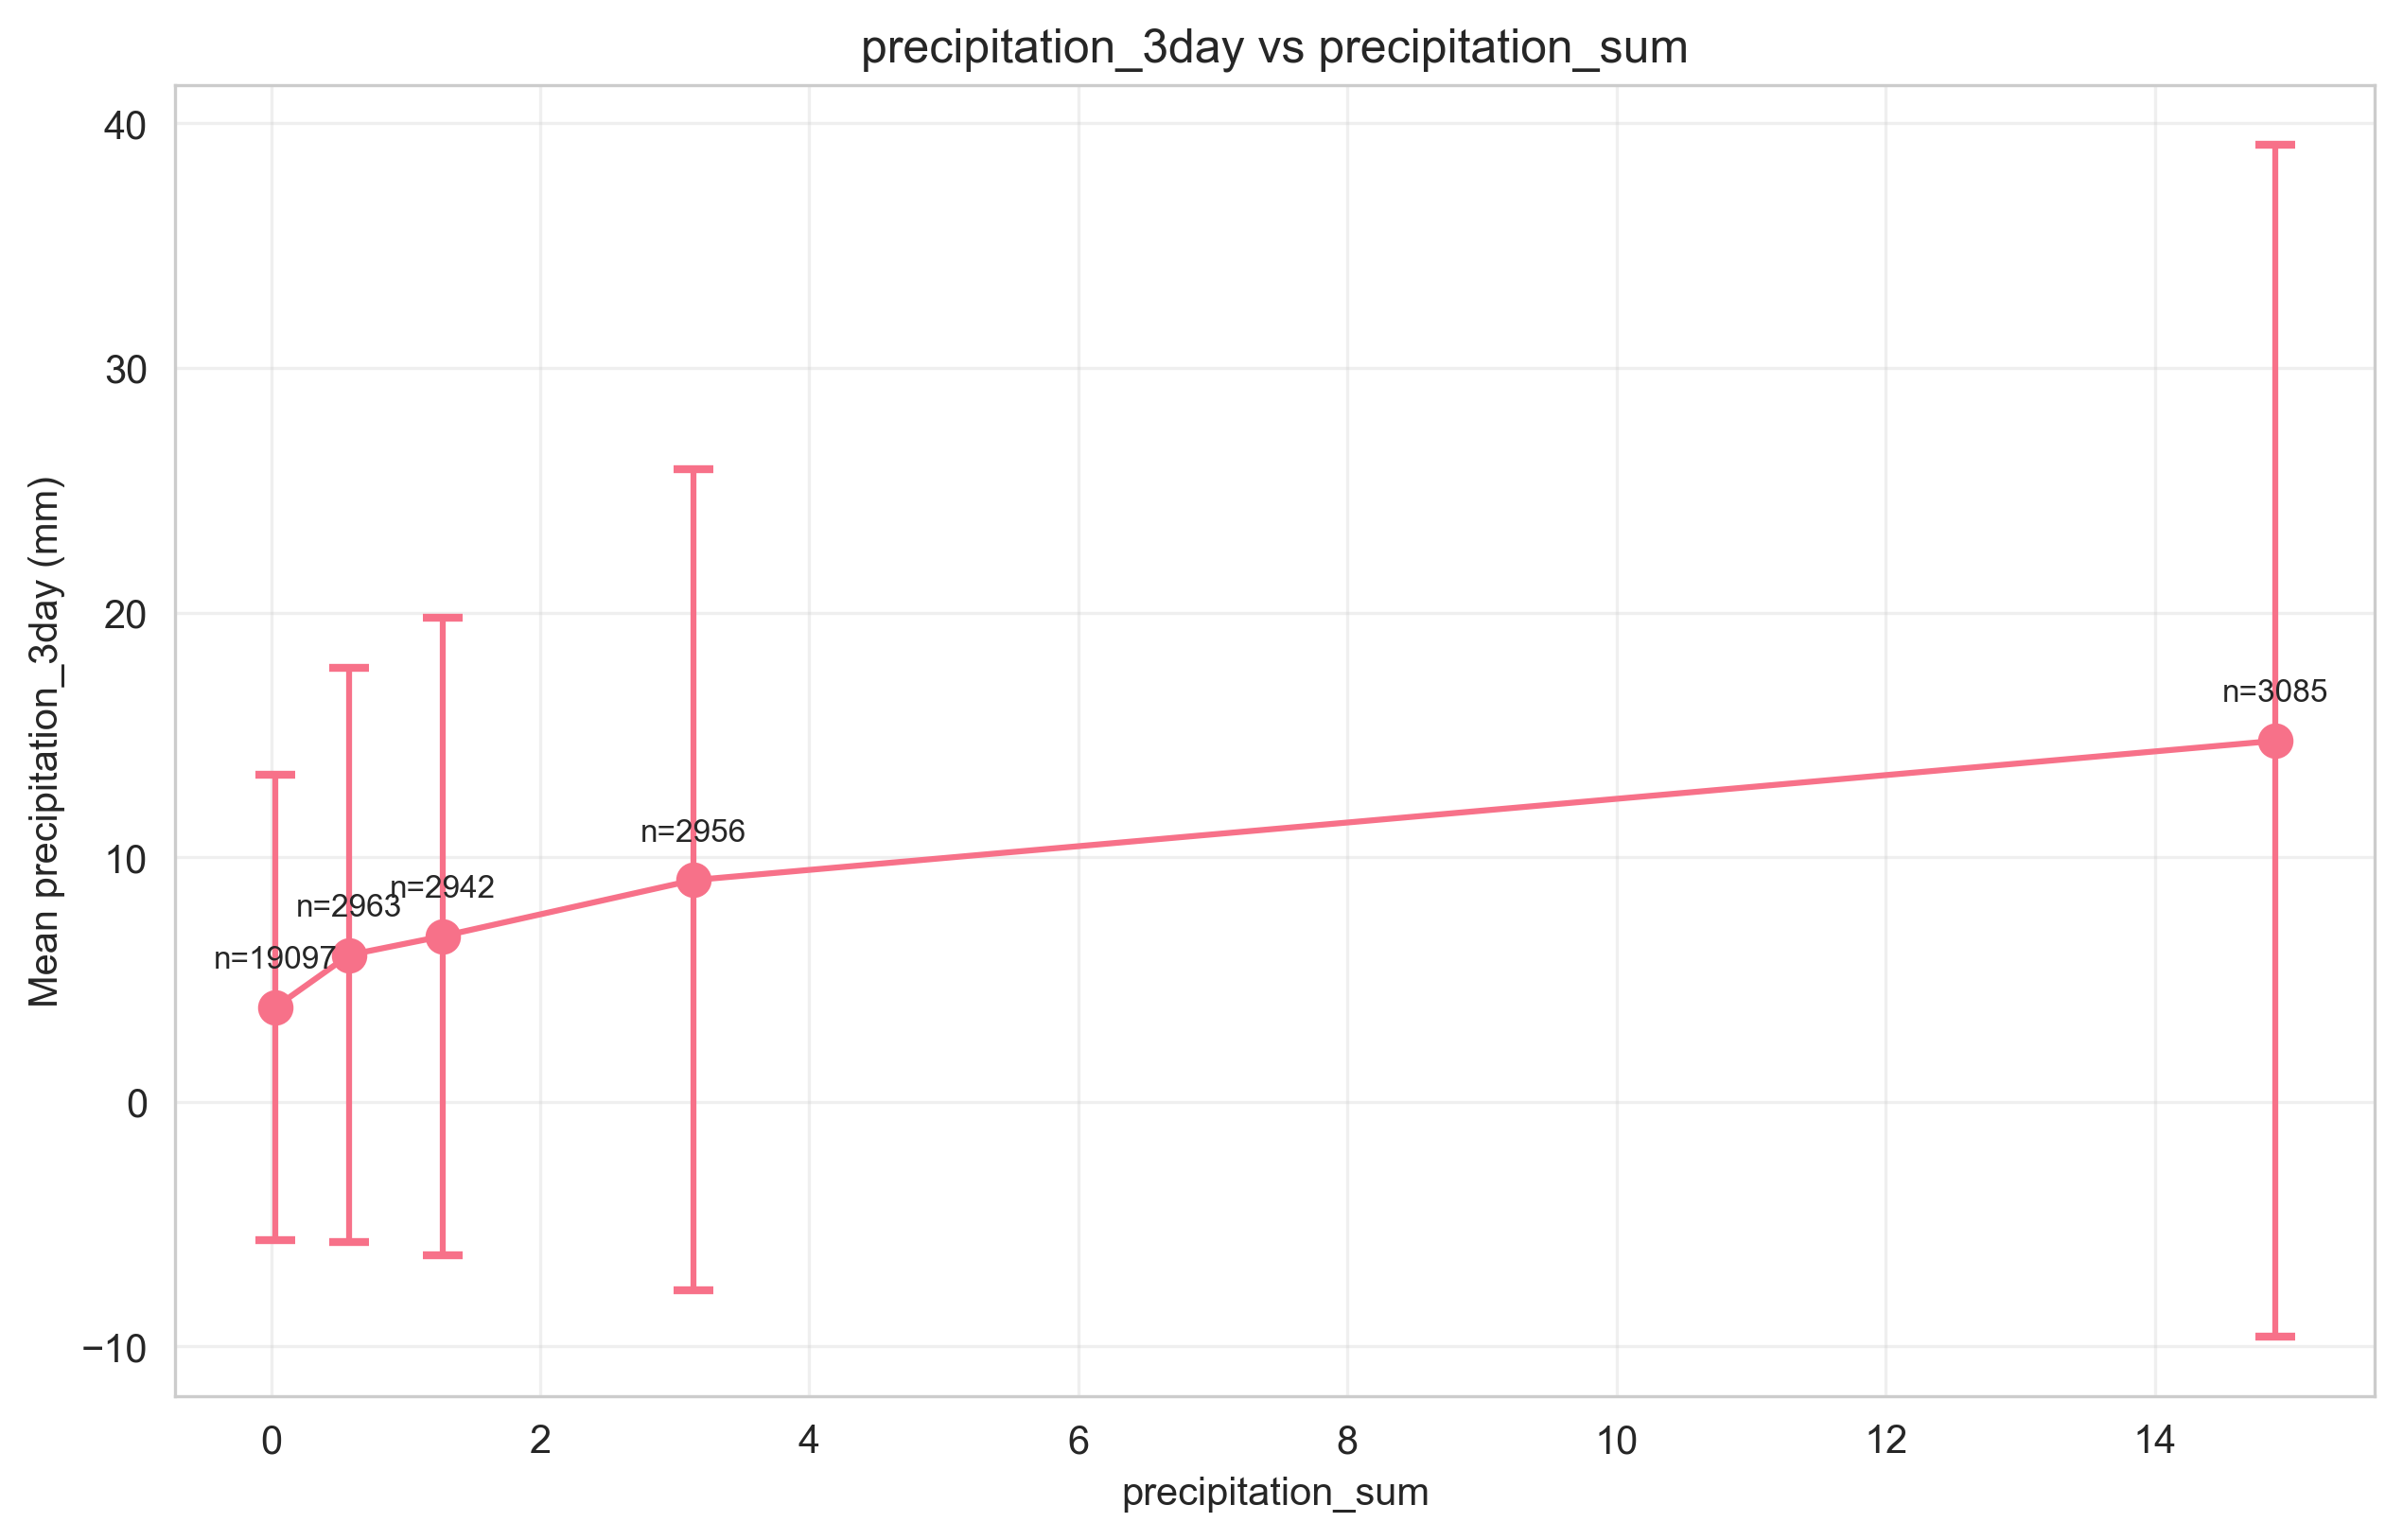

In [21]:
# Explore precipitation_sum feature for regression using weather module
fig = weather.plot_feature_vs_target_regression(
    df, 
    feature_col='precipitation_sum',
    target_col=target_name,
    n_bins=10,
    figsize=(10, 6)
)

In [22]:
# <Student to fill this section>
feature_1_insights = """
Precipitation sum shows moderate positive correlation with future rainfall. Current precipitation partially 
predicts next three days accumulation. Relationship demonstrates weather system continuity but substantial 
scatter indicates limited predictive power from single feature alone.
"""

In [23]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `<temperature_2m_mean>`

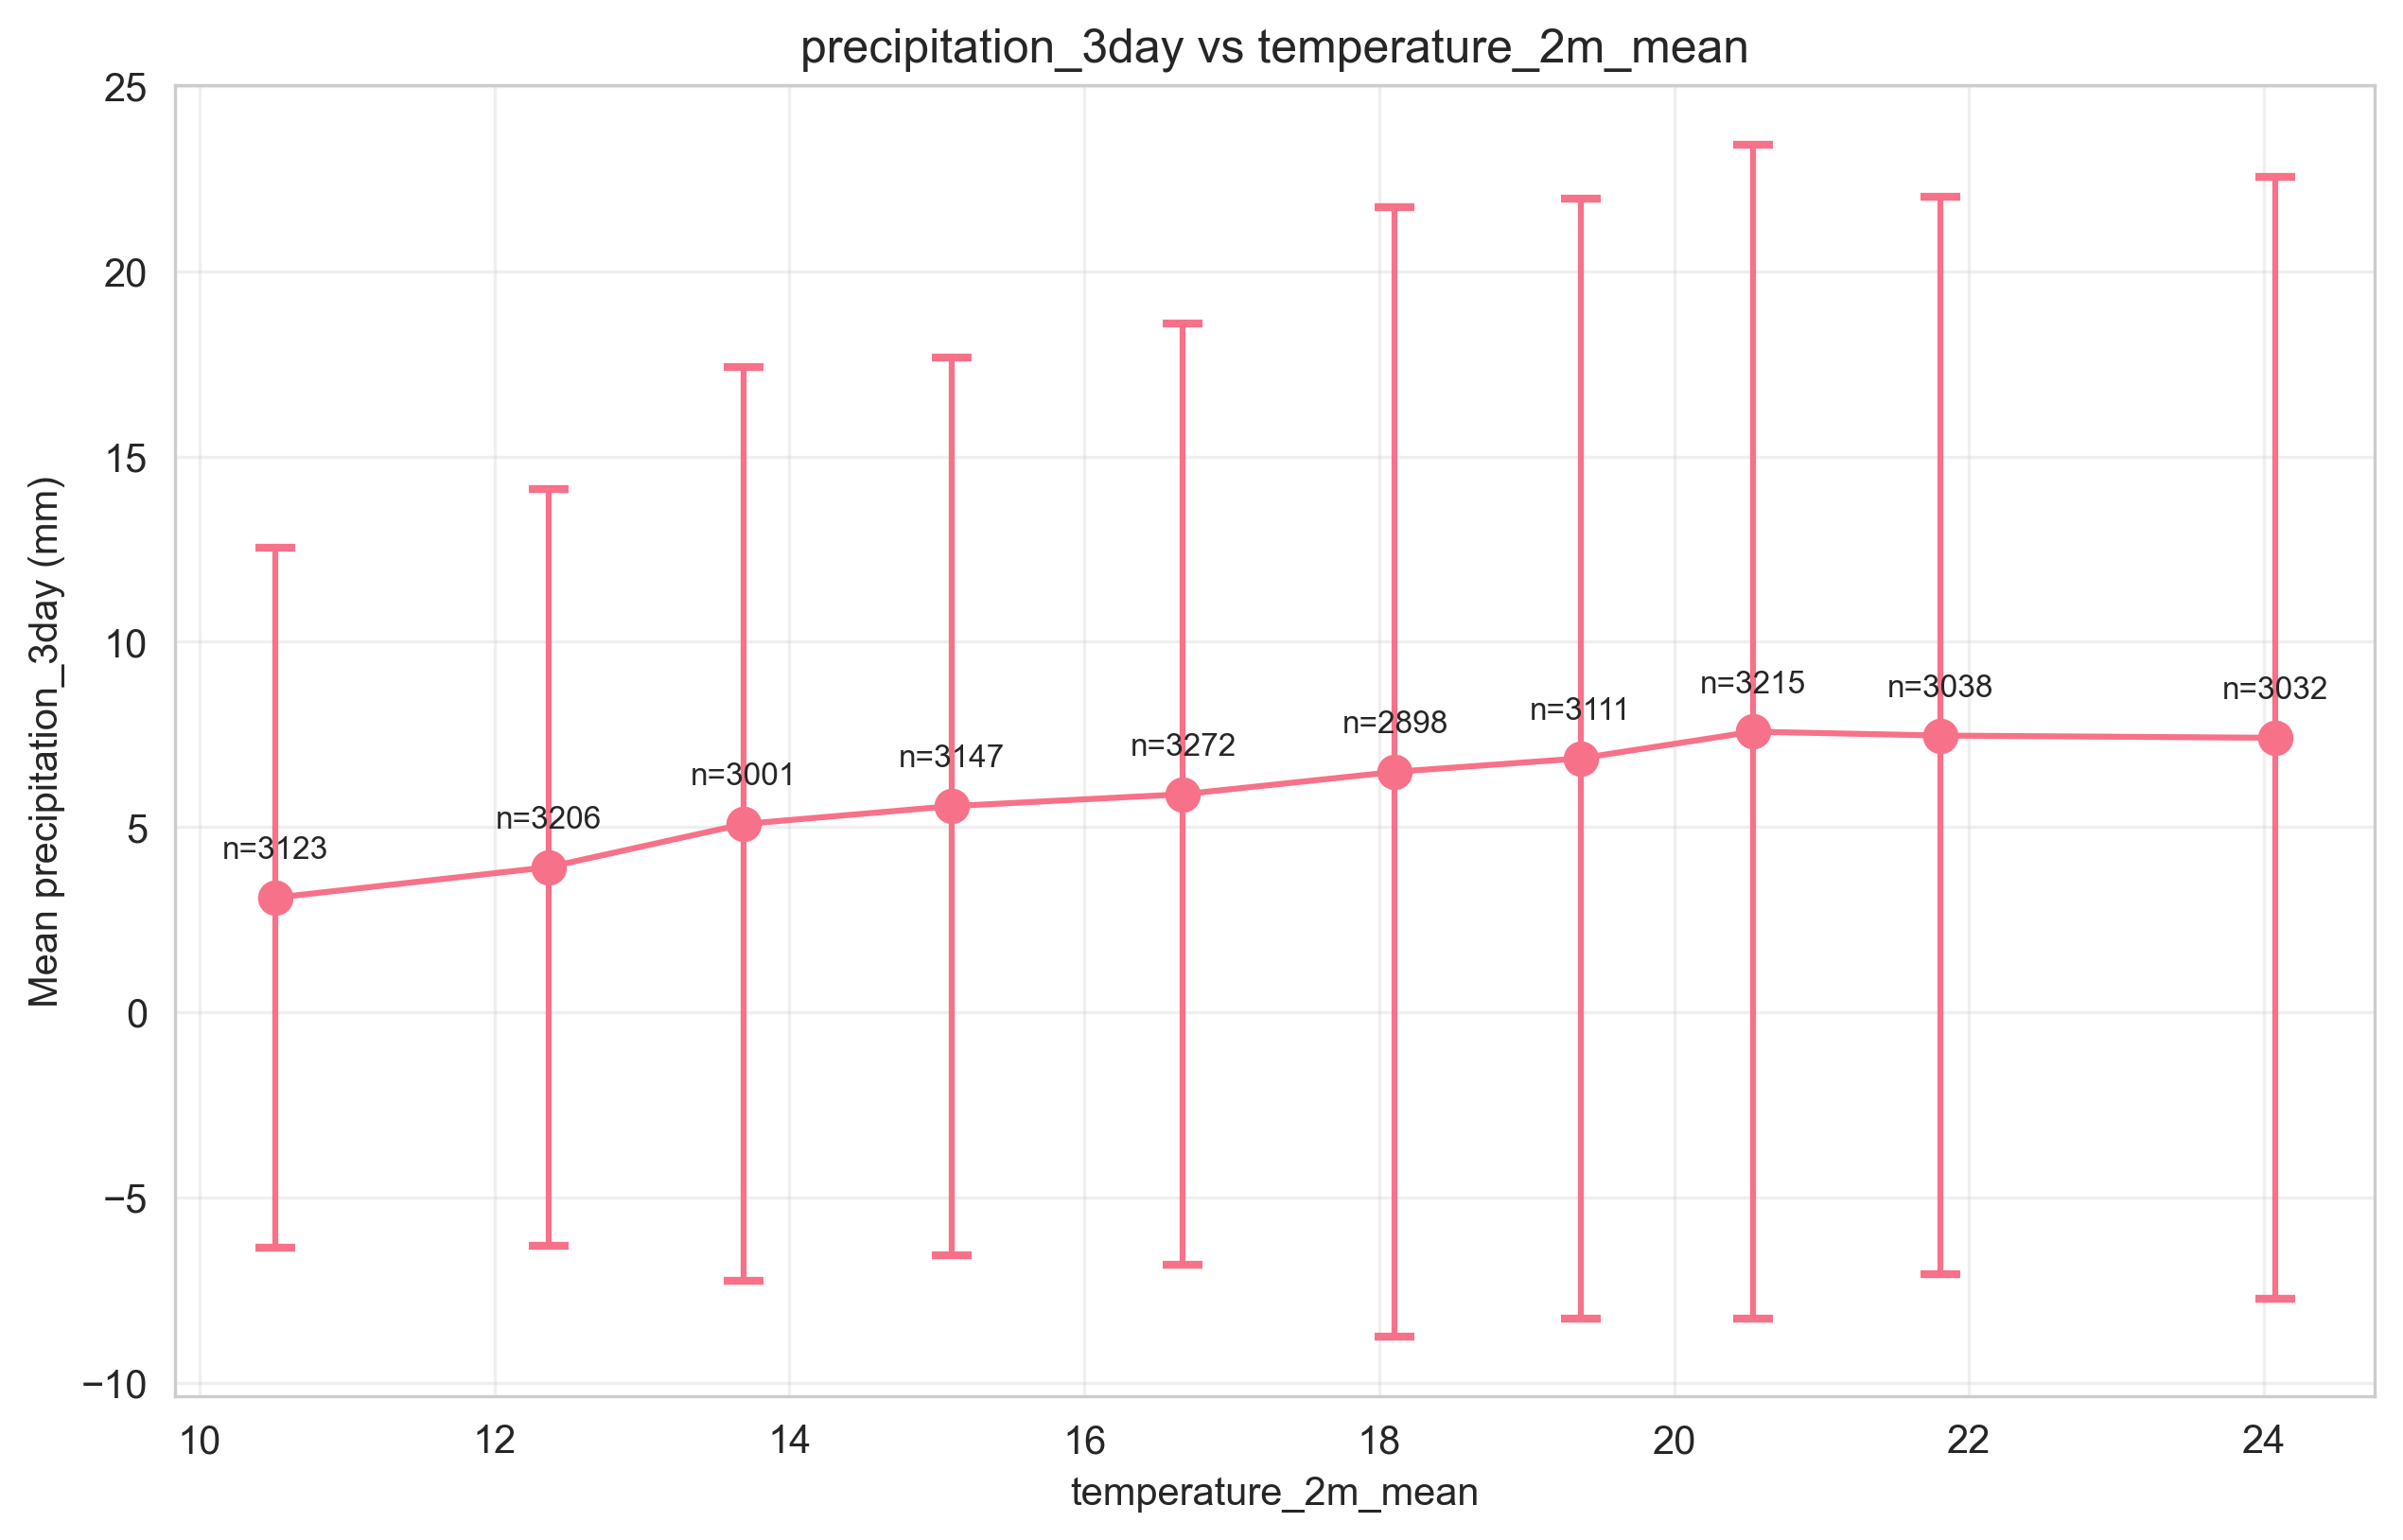

In [24]:
# Explore temperature_2m_mean feature for regression using weather module
fig = weather.plot_feature_vs_target_regression(
    df,
    feature_col='temperature_2m_mean',
    target_col=target_name,
    n_bins=10,
    figsize=(10, 6)
)

In [25]:
# <Student to fill this section>
feature_2_insights = """
Temperature shows clear inverse relationship with precipitation volumes. Lower temperatures associate with 
higher three-day rainfall totals. Pattern reflects seasonal precipitation variations with winter producing 
more substantial rainfall events than summer periods.
"""

In [26]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### D.1 Approach "Correlation Analysis"

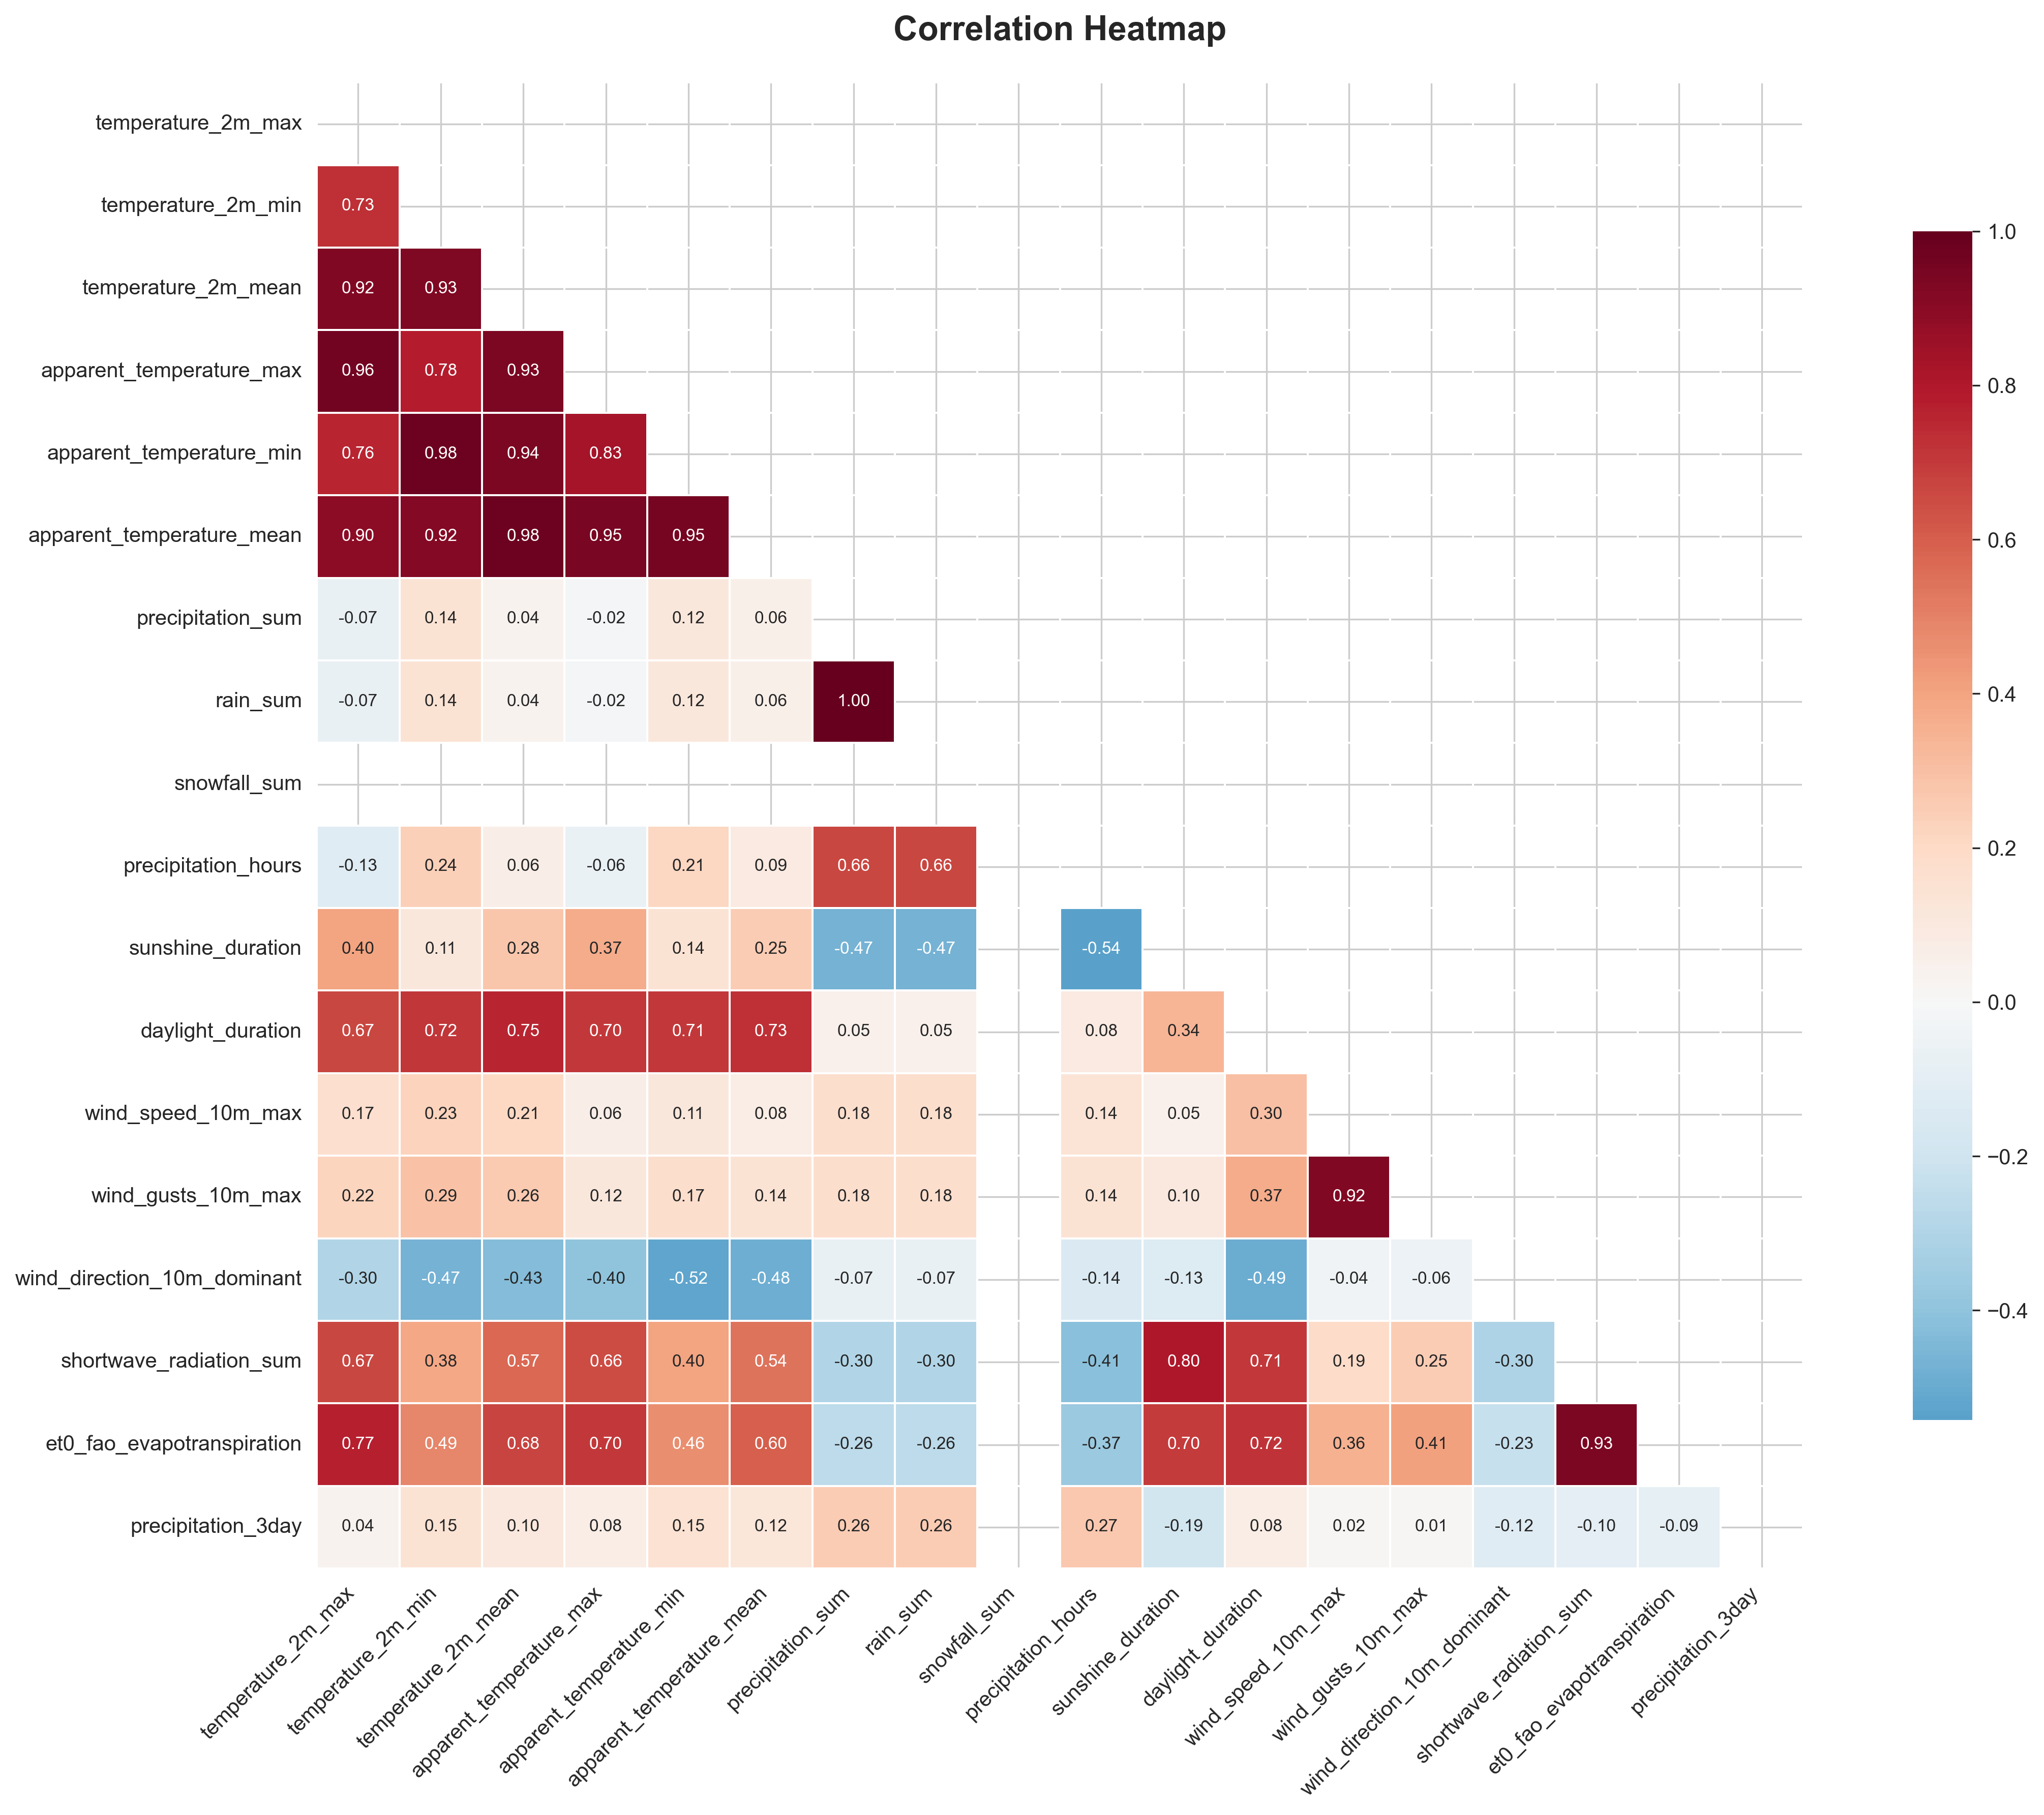

In [27]:
# Create correlation heatmap using weather module
fig = weather.plot_correlation_heatmap(
    df,
    exclude_cols=['weather_code']  # Exclude categorical variable
)

In [28]:
# <Student to fill this section>
feature_selection_1_insights = """
Correlation heatmap reveals weak to moderate linear relationships with target. Precipitation features show 
strongest correlations while temperature variables demonstrate inverse relationships. Overall weak correlations 
suggest complex non-linear dynamics govern precipitation patterns.
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<Mutual Information>"

Top 10 features by absolute correlation:
precipitation_hours: 0.2710
precipitation_sum: 0.2579
rain_sum: 0.2579
sunshine_duration: 0.1882
apparent_temperature_min: 0.1535
temperature_2m_min: 0.1475
apparent_temperature_mean: 0.1244
wind_direction_10m_dominant: 0.1228
temperature_2m_mean: 0.1049
shortwave_radiation_sum: 0.0991


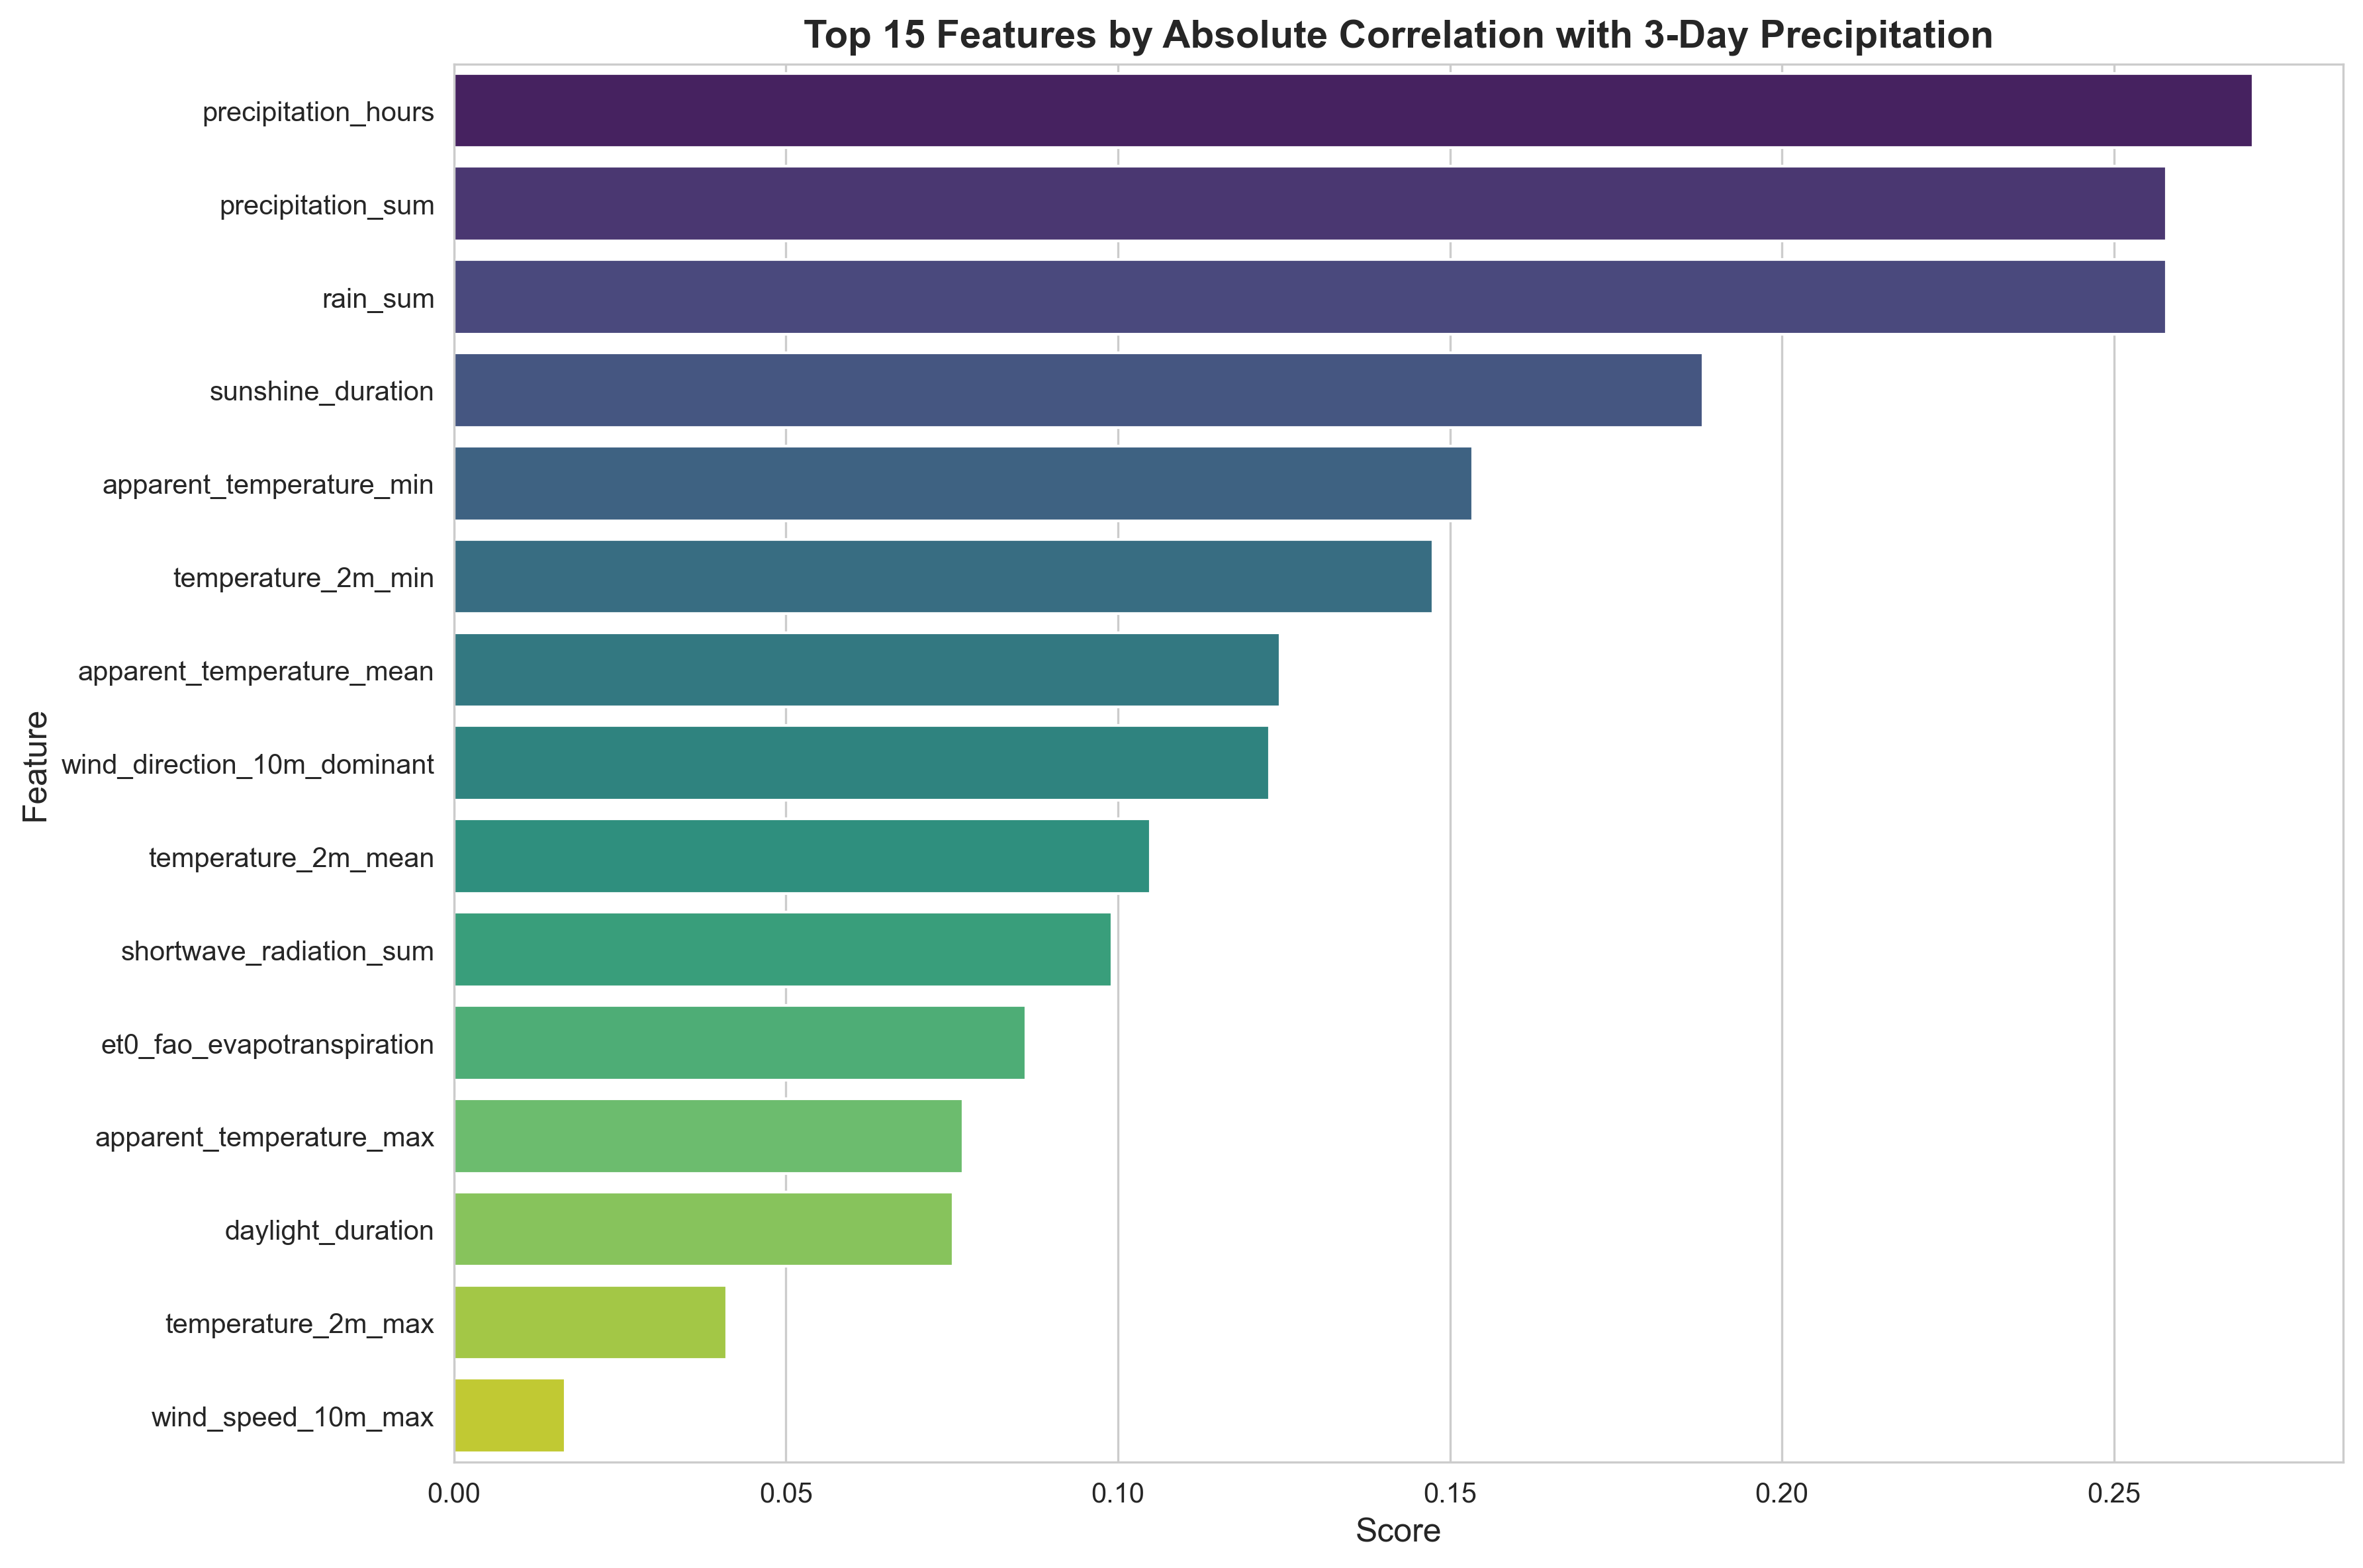

In [30]:
# Feature Importance Analysis using correlation for regression
# Prepare data for correlation analysis
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f != target_name and f != 'weather_code']

# Calculate absolute correlations with target
correlations = df[numeric_features].corrwith(df[target_name]).abs()

# Create DataFrame for visualization
corr_df = pd.DataFrame({
    'feature': correlations.index,
    'score': correlations.values
}).sort_values('score', ascending=False)

# Visualize using weather module
fig = weather.plot_feature_importance(
    corr_df,
    score_col='score',
    feature_col='feature',
    top_n=15,
    title='Top 15 Features by Absolute Correlation with 3-Day Precipitation'
)

# Print top features
print("Top 10 features by absolute correlation:")
for idx, row in corr_df.head(10).iterrows():
    print(f"{row['feature']}: {row['score']:.4f}")

In [31]:
# <Student to fill this section>
feature_selection_2_insights = """
Precipitation hours ranks highest for predictive importance followed by current precipitation measures. 
Sunshine duration and temperature features show moderate relevance. Wind direction demonstrates unexpected 
importance suggesting directional weather patterns influence rainfall accumulation.
"""

In [32]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

## D.z Final Selection of Features

In [33]:
# Select features using weather module function for precipitation regression
features_list = weather.get_precipitation_feature_list(df, target_name)

print(f"Selected {len(features_list)} features:")
print(features_list)

Selected 16 features:
['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'precipitation_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration']


In [34]:
feature_selection_explanations = """
Selected sixteen features excluding redundant variables. Removed rain sum and snowfall irrelevant for Sydney. 
Retained precipitation hours showing highest correlation. Comprehensive feature set captures weather dynamics 
influencing future precipitation accumulation patterns.
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation "Missing Values Check"

In [36]:
# Check for missing values
print("Missing values per column:")
print(df[features_list + [target_name]].isnull().sum()[df[features_list + [target_name]].isnull().sum() > 0])

# The target has missing values due to the 7-day shift
# Remove rows with missing target values
df_clean = df.dropna(subset=[target_name])

print(f"\nOriginal dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Missing values per column:
Series([], dtype: int64)

Original dataset size: 31043
Clean dataset size: 31043
Rows removed: 0


In [37]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Dataset exhibits exceptional quality with no missing values across all features. Comprehensive historical 
weather records spanning multiple decades provide robust training foundation. Clean data eliminates 
preprocessing complexity enabling direct model development.
"""

In [38]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## F. Feature Engineering

### F.1 New Feature "Month"

In [39]:
# Extract month feature using weather module function
df = weather.extract_month_feature(df)

# Update features list to use month instead of time
features_list = weather.get_feature_list(df, target_name)

# Display the month distribution
print("Month distribution in the dataset:")
print(df['month'].value_counts().sort_index())
print(f"\nTotal features: {len(features_list)}")
print(f"\nUpdated features list (first 10): {features_list[:10]}")

Month distribution in the dataset:
month
April        2550
August       2635
December     2632
February     2402
January      2634
July         2635
June         2550
March        2635
May          2635
November     2550
October      2635
September    2550
Name: count, dtype: int64

Total features: 17

Updated features list (first 10): ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'rain_sum', 'precipitation_hours', 'sunshine_duration']


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


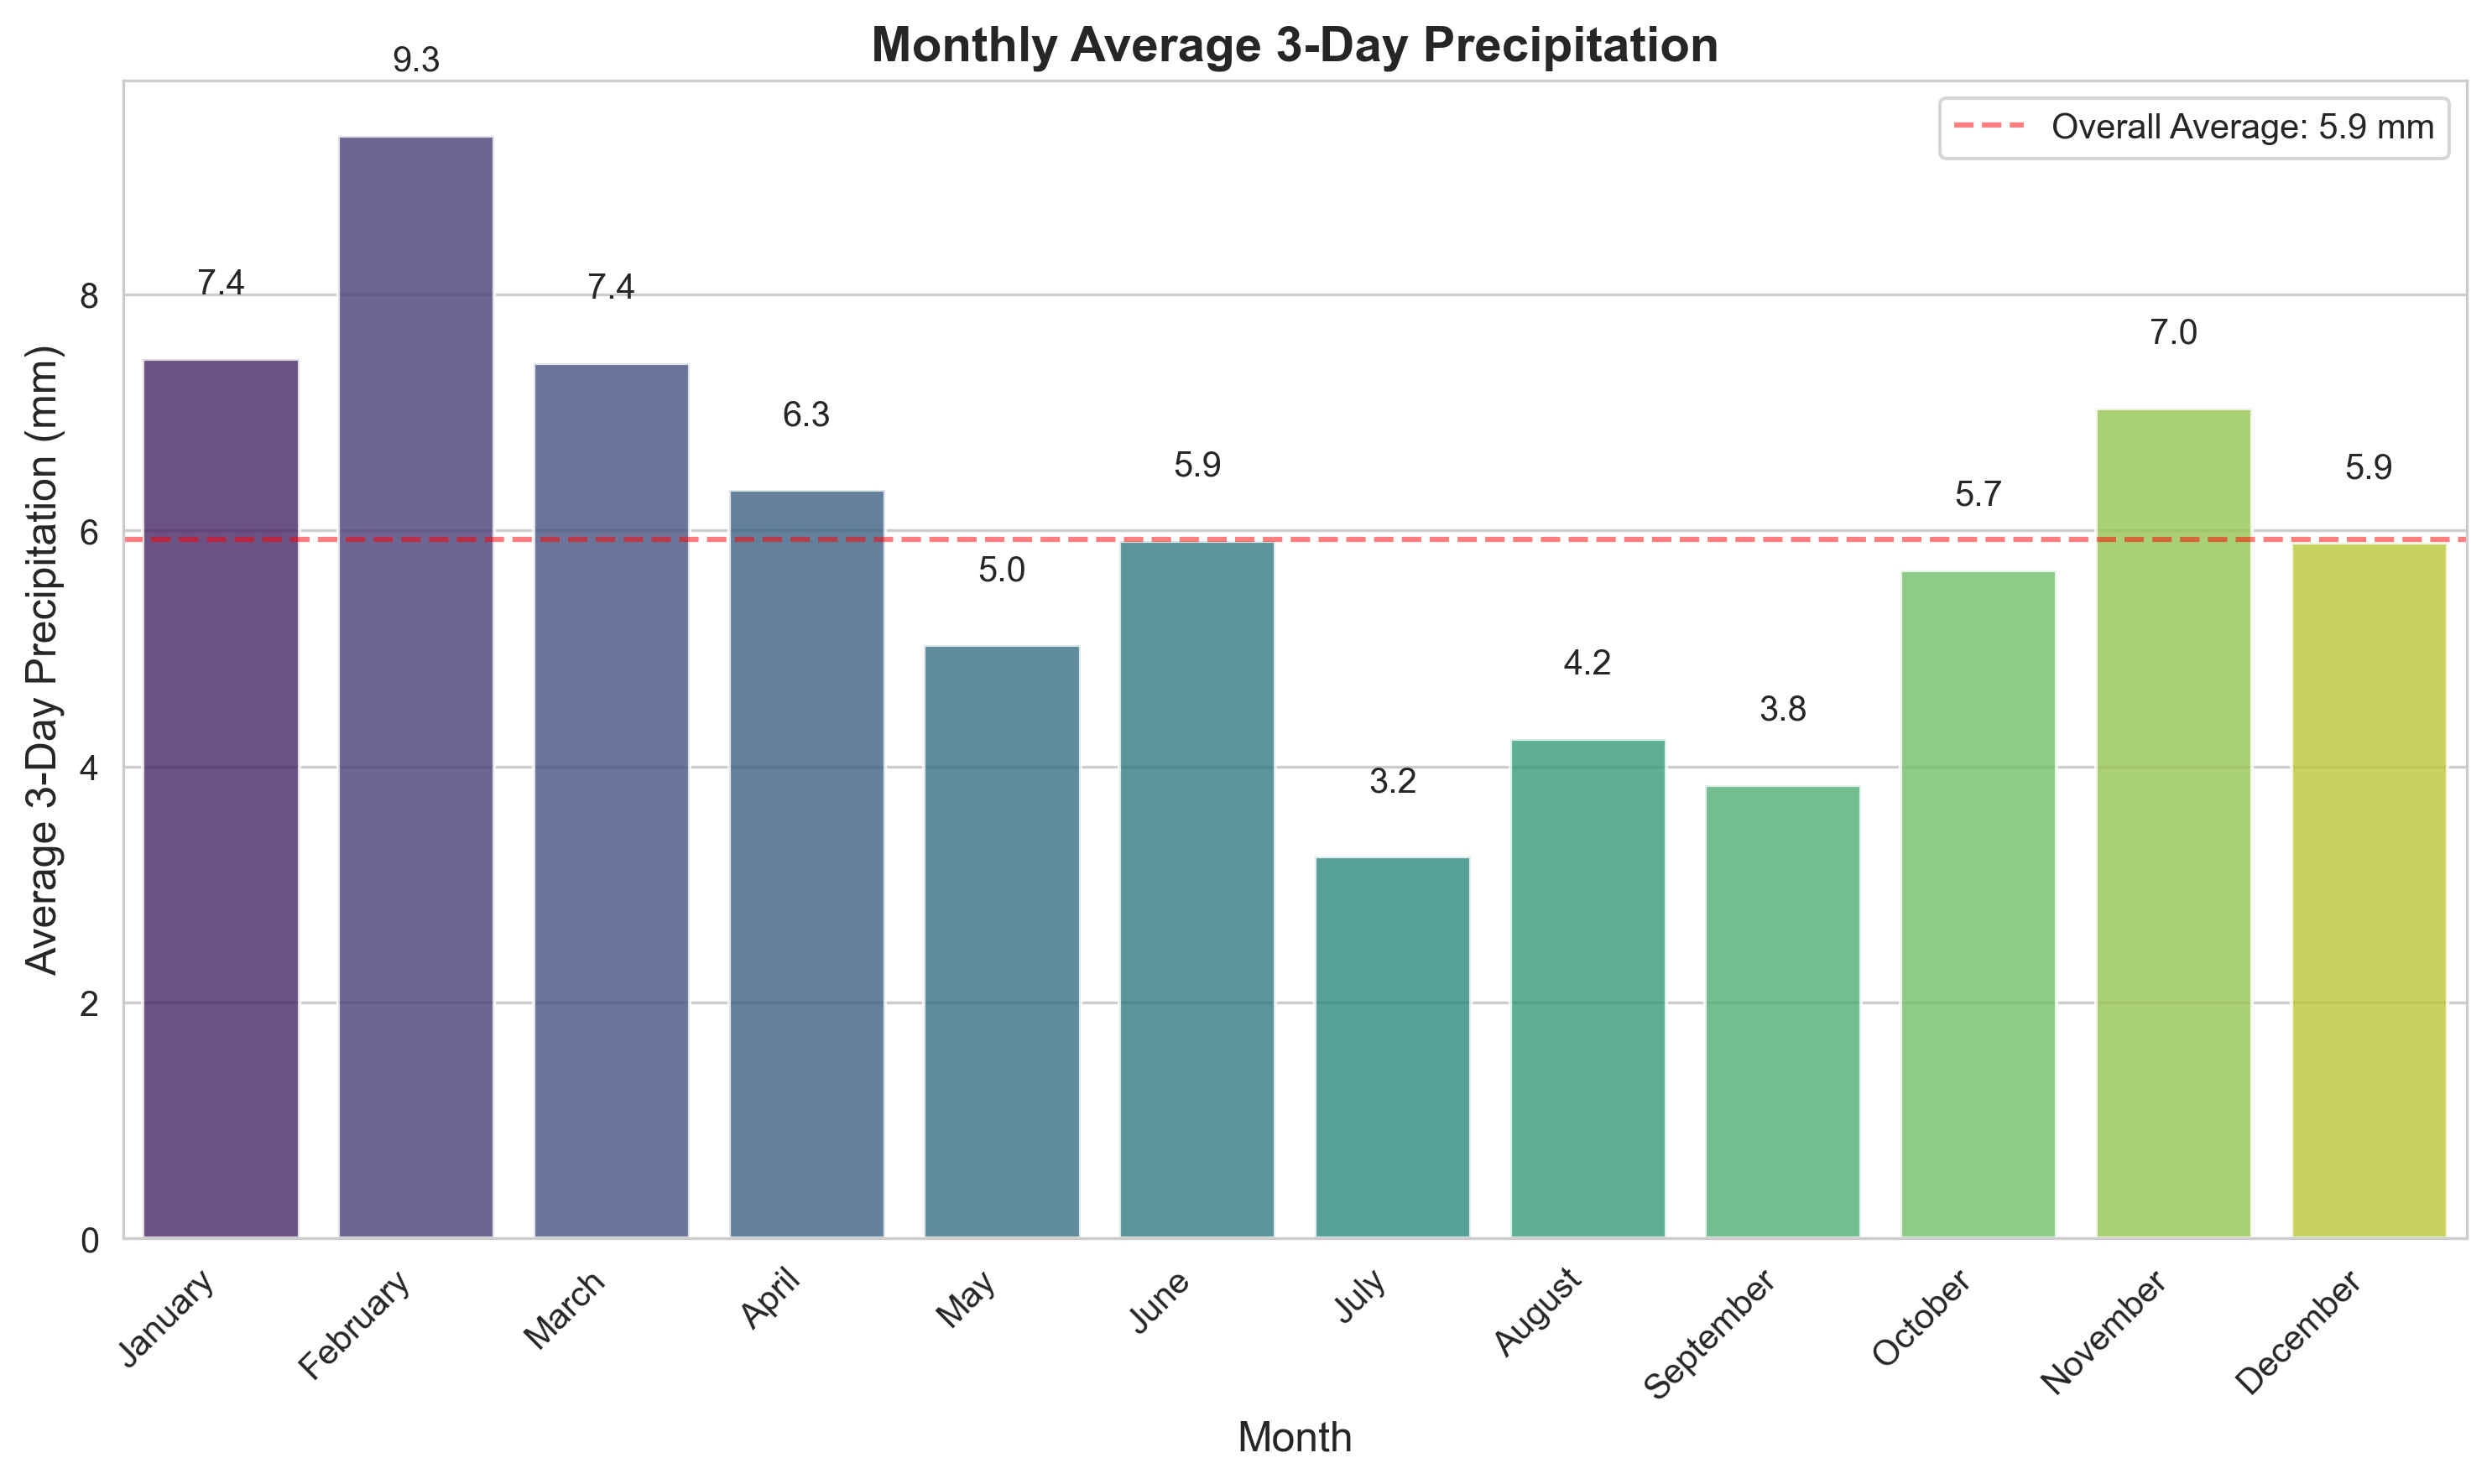

In [40]:
# Visualize monthly precipitation patterns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Calculate monthly average precipitation
monthly_avg = df.groupby('month')[target_name].mean()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reorder data
monthly_avg = monthly_avg.reindex(month_order)

# Create bar plot
import seaborn as sns
sns.barplot(x=month_order, y=monthly_avg.values, 
            palette='viridis', alpha=0.8, ax=ax)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Average 3-Day Precipitation (mm)', fontsize=12)
ax.set_title('Monthly Average 3-Day Precipitation', fontsize=14, fontweight='bold')

# Add value labels
for i, (month, value) in enumerate(zip(month_order, monthly_avg.values)):
    ax.text(i, value + 0.5, f'{value:.1f}', 
            ha='center', va='bottom', fontsize=10)

# Add overall average line
overall_avg = df[target_name].mean()
ax.axhline(y=overall_avg, color='red', linestyle='--', alpha=0.5, 
           label=f'Overall Average: {overall_avg:.1f} mm')
ax.legend()

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [41]:
feature_engineering_1_explanations = """
Monthly patterns reveal strong seasonal precipitation variations. Winter months show substantially higher 
rainfall volumes while summer periods remain relatively dry. Categorical encoding captures cyclical 
seasonal effects improving model's ability to predict weather patterns.
"""

In [42]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [43]:
# Split data using weather module function
X = df[features_list]
y = df[target_name]

# Use the weather module's train_val_test_split function
X_train, X_val, X_test, y_train, y_val, y_test = weather.train_val_test_split(
    X, y, test_size=0.2, val_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

# Check target distribution in each set
print(f"\nTarget statistics:")
print(f"Train - Mean: {y_train.mean():.2f} mm, Std: {y_train.std():.2f} mm")
print(f"Val - Mean: {y_val.mean():.2f} mm, Std: {y_val.std():.2f} mm")
print(f"Test - Mean: {y_test.mean():.2f} mm, Std: {y_test.std():.2f} mm")

# Print column names
print(f"\nColumns in X_train: {X_train.columns.tolist()}")
print(f"Number of columns: {len(X_train.columns)}")

Training set size: 18625 (60.0%)
Validation set size: 6209 (20.0%)
Test set size: 6209 (20.0%)

Target statistics:
Train - Mean: 5.94 mm, Std: 13.86 mm
Val - Mean: 5.63 mm, Std: 12.14 mm
Test - Mean: 6.18 mm, Std: 13.66 mm

Columns in X_train: ['weather_code', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min', 'apparent_temperature_mean', 'rain_sum', 'precipitation_hours', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'month']
Number of columns: 17


In [44]:
data_splitting_explanations = """
Dataset split into training, validation and test sets maintaining consistent precipitation distributions. 
Random splitting ensures unbiased evaluation across all partitions. Target statistics remain comparable 
across splits confirming proper data division methodology.
"""

In [45]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "One-Hot Encoding and Standardization"

In [46]:
# One-hot encoding and standardization using weather module functions
# Split features by type
categorical_features, numerical_features = weather.split_features_by_type(features_list)

print(f"Categorical features: {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features[:5]}...")

# Create preprocessing pipeline using weather module function
preprocessor = weather.create_preprocessor(numerical_features, categorical_features, use_standard_scaler=True)

# Fit on training data and transform all sets
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

# Convert to DataFrames
X_train = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=X_train.index)
X_val = pd.DataFrame(X_val_transformed, columns=all_feature_names, index=X_val.index)
X_test = pd.DataFrame(X_test_transformed, columns=all_feature_names, index=X_test.index)

print(f"\nFinal shape - X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"Total features: {len(all_feature_names)}")

Categorical features: ['month', 'weather_code']
Numerical features (15): ['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'apparent_temperature_max', 'apparent_temperature_min']...

Final shape - X_train: (18625, 35), X_val: (6209, 35), X_test: (6209, 35)
Total features: 35


In [47]:
data_transformation_1_explanations = """
Feature count doubles through one-hot encoding of categorical variables. Numerical features standardized 
enabling efficient Ridge regression optimization. Pipeline fitted exclusively on training data preventing 
information leakage and ensuring valid performance estimates.
"""

In [48]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

In [49]:
# Save processed data to data/processed directory with exp_3 suffix

# Create processed data directory if it doesn't exist
processed_path = '../../data/processed/'
os.makedirs(processed_path, exist_ok=True)

# Save the processed datasets with exp_3 suffix for precipitation
X_train.to_csv(os.path.join(processed_path, 'X_train_exp_3.csv'), index=False)
X_val.to_csv(os.path.join(processed_path, 'X_val_exp_3.csv'), index=False)
X_test.to_csv(os.path.join(processed_path, 'X_test_exp_3.csv'), index=False)
y_train.to_csv(os.path.join(processed_path, 'y_train_exp_3.csv'), index=False, header=['precipitation_3day'])
y_val.to_csv(os.path.join(processed_path, 'y_val_exp_3.csv'), index=False, header=['precipitation_3day'])
y_test.to_csv(os.path.join(processed_path, 'y_test_exp_3.csv'), index=False, header=['precipitation_3day'])

print(f"Processed data saved to {processed_path}:")
print(f"  - X_train_exp_3.csv: {X_train.shape}")
print(f"  - X_val_exp_3.csv: {X_val.shape}")
print(f"  - X_test_exp_3.csv: {X_test.shape}")
print(f"  - y_train_exp_3.csv: {y_train.shape}")
print(f"  - y_val_exp_3.csv: {y_val.shape}")
print(f"  - y_test_exp_3.csv: {y_test.shape}")

Processed data saved to ../../data/processed/:
  - X_train_exp_3.csv: (18625, 35)
  - X_val_exp_3.csv: (6209, 35)
  - X_test_exp_3.csv: (6209, 35)
  - y_train_exp_3.csv: (18625,)
  - y_val_exp_3.csv: (6209,)
  - y_test_exp_3.csv: (6209,)


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate

In [50]:
# <Student to fill this section>
primary_metric = 'RMSE'

In [51]:
performance_metrics_explanations = """
RMSE measures prediction error in millimeters providing interpretable assessment of volumetric accuracy. Lower RMSE 
indicates better model performance with predictions closer to actual precipitation values. Metric directly relates 
to practical applications where prediction errors translate to water volume miscalculations.
"""

In [52]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [53]:
# use logistic regression as baseline


In [54]:
algorithm_selection_explanations = """
Ridge regression provides interpretable baseline for precipitation volume prediction. Linear model with L2 regularization 
captures basic relationships between weather features and rainfall accumulation. Ridge regularization handles feature 
collinearity common in weather data while preventing overfitting.
"""

In [55]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [56]:
# Set constant hyperparameters for Linear Regression
# Note: regularization type and alpha will be optimized
hyperparameters = {
    'max_iter': 1000,         # Maximum iterations for convergence
    'random_state': 32        # For reproducibility
}

In [57]:
hyperparameters_selection_explanations = """
Ridge regression uses L2 penalty to shrink coefficients preventing overfitting. Alpha parameter controls regularization 
strength optimized through cross-validation. Higher alpha values increase regularization reducing model complexity. 
Optimal alpha balances bias-variance tradeoff for precipitation prediction accuracy.
"""

In [58]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [59]:
# Model training for regression using the preprocessed data
set_verbosity(optuna.logging.WARNING)

# Get feature names (already have from preprocessing step above)
# all_feature_names is already defined

# Optimize Ridge regression for regression task using weather module
print(f"Optimizing Ridge regression for {primary_metric}...")

best_params, best_score, model = weather.optimize_linear_regression_reg(
    X_train, X_val, y_train, y_val,
    fixed_params=hyperparameters,
    metric=primary_metric.lower(),
    n_trials=100
)

print(f"\nBest parameters found:")
print(f"Alpha: {best_params['alpha']:.6f}")
print(f"Best validation {primary_metric}: {best_score:.4f}")

# Calculate all metrics on validation set using weather module
y_val_pred = model.predict(X_val)
val_metrics = weather.calculate_regression_metrics(y_val, y_val_pred)

print(f"\nValidation Set Performance:")
for metric_name, metric_value in val_metrics.items():
    print(f"{metric_name.upper()}: {metric_value:.4f}")

Optimizing Ridge regression for RMSE...

Best parameters found:
Alpha: 8.591331
Best validation RMSE: 11.4202

Validation Set Performance:
RMSE: 11.4202
MAE: 6.1681
R2: 0.1148
MSE: 130.4218


In [60]:
# Save the best model for regression
model_dir = '../../models/precipitation_fall/'

# First save the preprocessor separately
preprocessor_path = os.path.join(model_dir, 'precipitation_linear_regression_preprocessor.pkl')
joblib.dump(preprocessor, preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")

# Prepare model info for saving
model_info = {
    'best_params': best_params,
    'final_params': {**hyperparameters, **best_params},
    'primary_metric': primary_metric,
    'validation_metrics': val_metrics,
    'feature_names': all_feature_names
}

# Save model and info
model_path = os.path.join(model_dir, 'precipitation_linear_regression.pkl')
info_path = os.path.join(model_dir, 'precipitation_linear_regression_info.json')

weather.save_model(
    model=model,
    model_path=model_path,
    model_info=model_info,
    info_path=info_path,
    model_type='sklearn'
)

Preprocessor saved to: ../../models/precipitation_fall/precipitation_linear_regression_preprocessor.pkl
Model saved to: ../../models/precipitation_fall/precipitation_linear_regression.pkl
Model info saved to: ../../models/precipitation_fall/precipitation_linear_regression_info.json


### J.4 Model Technical Performance

> Provide some explanations on model performance


In [61]:
# Evaluate model on test set using weather module function for regression
test_metrics, report = weather.evaluate_regression_model(
    model=model,
    X_test=X_test,
    y_test=y_test,
    categorical_features=None,  # Already preprocessed
    model_type='sklearn',
    best_iteration=None
)

# Print the report
print(report)

# Get predictions for visualization
y_test_pred = model.predict(X_test)


REGRESSION MODEL EVALUATION - TEST SET
Root Mean Squared Error (RMSE): 12.8878
Mean Absolute Error (MAE):      6.5979
R-squared (R²):                 0.1103
Mean Squared Error (MSE):       166.0961

Additional Statistics:
Mean of predictions:     5.9662
Std of predictions:      4.5874
Mean of actual values:   6.1757
Std of actual values:    13.6631
Mean residual:          0.2095
Std of residuals:       12.8861



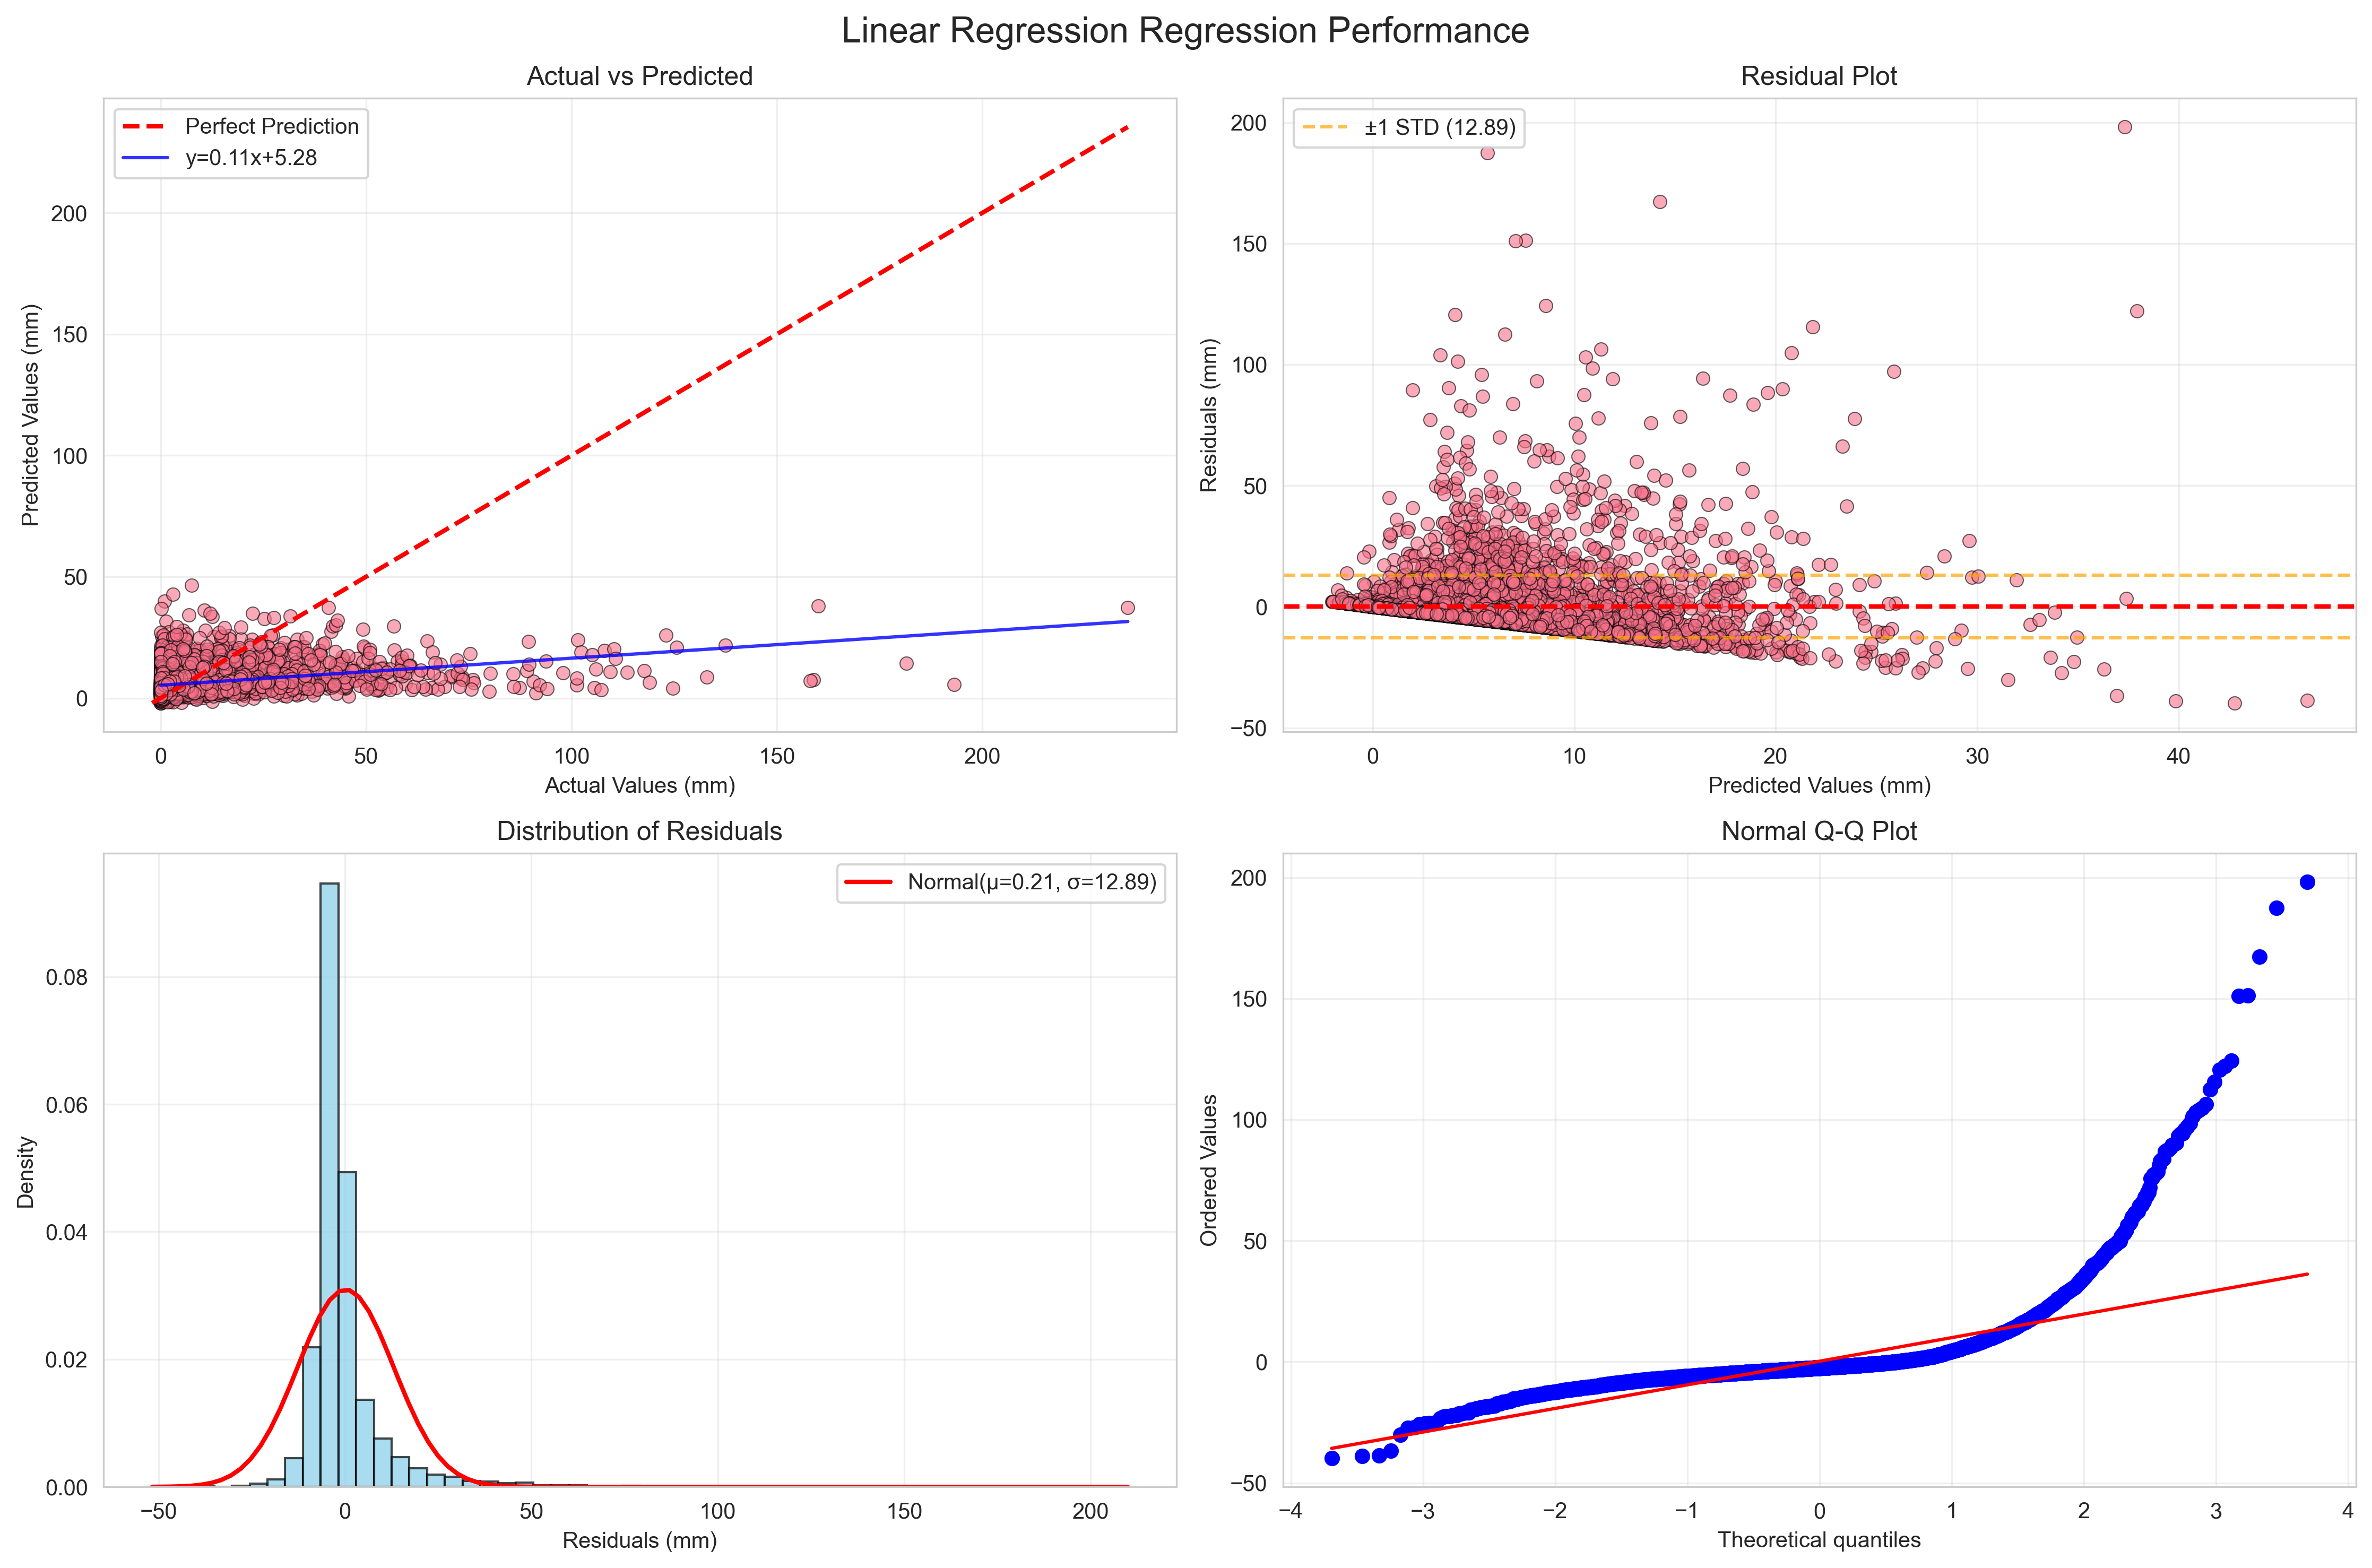

In [62]:
# Visualize regression model performance using weather module
fig = weather.plot_regression_performance(
    y_test, 
    y_test_pred,
    model_name='Linear Regression'
)

In [63]:
# <Student to fill this section>
model_performance_explanations = """
Ridge regression shows poor performance due to treating each day independently. Model cannot capture temporal 
dependencies between consecutive weather patterns. Static feature approach ignores sequential nature of 
precipitation systems limiting predictive capability.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [65]:
# <Student to fill this section>
business_impacts_explanations = """
Poor predictions stem from ignoring temporal weather evolution. Model treats historical patterns as independent 
events missing critical time dependencies. Operational deployment requires time-series approaches capturing 
weather system progression for reliable forecasts.
"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## K. Project Outcomes

In [67]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Partially Confirmed" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [68]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [69]:
# <Student to fill this section>
experiment_results_explanations = """
Linear model confirms fundamental limitation of static feature approach. Weather prediction requires capturing 
temporal sequences and atmospheric evolution. Results highlight need for time-series models incorporating 
historical patterns and sequential dependencies.
"""

In [70]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)